<a href="https://colab.research.google.com/github/penguin-96/EDA/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12,6)

In [ ]:
# loading data
# for utf error: https://stackoverflow.com/questions/19699367/for-line-in-results-in-unicodedecodeerror-utf-8-codec-cant-decode-byte

data = pd.read_csv("/content/zomato.csv", encoding= 'latin-1')
data.head()

# excel file
country = pd.read_excel("/content/Country-Code.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
# creating numerical and categorical variables
# checking for Cardinality in Categorical Features

num_col = [i for i in data.columns[:-1] if data[i].dtype != 'object']
cat_col = [i for i in data.columns if data[i].dtype == 'object']

for i in cat_col:
  unique_value= data[i].nunique()
  print("Unique Value in " + i, unique_value)

Unique Value in Restaurant Name 7446
Unique Value in City 141
Unique Value in Address 8918
Unique Value in Locality 1208
Unique Value in Locality Verbose 1265
Unique Value in Cuisines 1825
Unique Value in Currency 12
Unique Value in Has Table booking 2
Unique Value in Has Online delivery 2
Unique Value in Is delivering now 2
Unique Value in Switch to order menu 1
Unique Value in Rating color 6
Unique Value in Rating text 6


In [ ]:
# checking for null columns
print(data.isnull().sum())
# cuisines has 9 null cells
print('---------')
# another approach
[fea for fea in data.columns if data[fea].isnull().sum() > 0]

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
---------


['Cuisines']

In [ ]:
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
# we can combine country code in country list with country code in main data with the help of merge

data_new = pd.merge(data,country, how= 'left', on= 'Country Code')


In [ ]:
data_new.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [ ]:
data_new.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [ ]:
country_val = data_new.Country.value_counts().values

In [ ]:
country_label = data_new.Country.value_counts().index

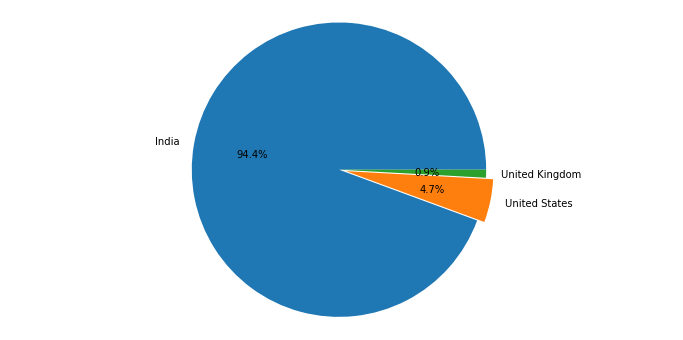

In [ ]:
# pie chart of top 3 countries
explode = (0, 0.05, 0) # takes out 1 slice of the pie( 2nd in this case)

fig1, ax1 = plt.subplots()

ax1.pie(country_val[:3], labels=country_label[:3], explode = explode, autopct='%1.1f%%')
ax1.axis('equal')

plt.show()

Majority of the users are from India followed by US and UK

In [ ]:
# creating a new rating dataframe 
# most are average followed by unrated and good ratings 
rating = data_new.groupby(['Aggregate rating',	'Rating color',	'Rating text']).size().reset_index().rename(columns = { 0 : 'No. of Ratings'})

rating

,Aggregate rating,Rating color,Rating text,No. of Ratings
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


conclusion:


1.   When rating is between 1-2.4, rating is poor
1.   When rating is between 2.5-3.4, rating is average
2.   When rating is between 3.5-3.9, rating is Good
1.   When rating is between 4.0-4.4, rating is V. Good
2.   When rating is between 4.5-4.9, rating is Excellent









In [ ]:
rating_2 = data_new.groupby([	'Rating color',	'Rating text']).size().reset_index().rename(columns = {0: 'No. of Ratings'})
rating_2.sort_values('No. of Ratings')

,Rating color,Rating text,No. of Ratings
3,Red,Poor,186
0,Dark Green,Excellent,301
1,Green,Very Good,1079
5,Yellow,Good,2100
4,White,Not rated,2148
2,Orange,Average,3737


In [ ]:
data_new.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

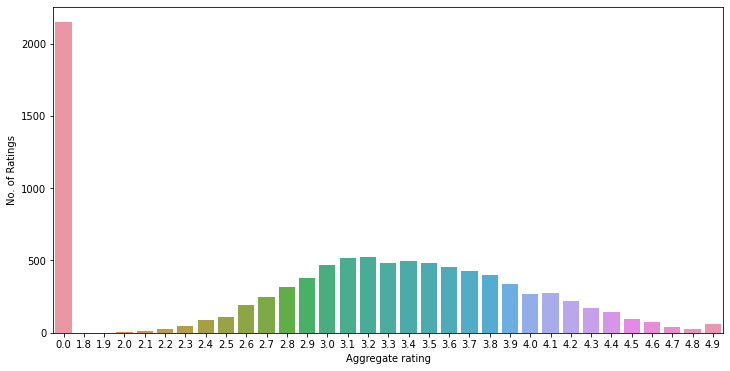

In [ ]:
sns.barplot(x= 'Aggregate rating', y= 'No. of Ratings', data = rating)

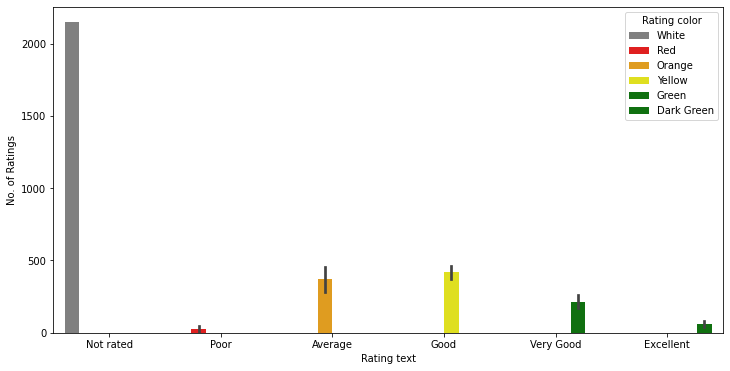

In [ ]:
color = ['grey', 'red', 'orange', 'yellow', 'green', 'green']
sns.barplot(x= 'Rating text', y= 'No. of Ratings', data = rating, hue = 'Rating color', palette= color )



1.   max are not rated
1.   most are rated as good followed by average
1.   max ratings are between 2.5-3.9







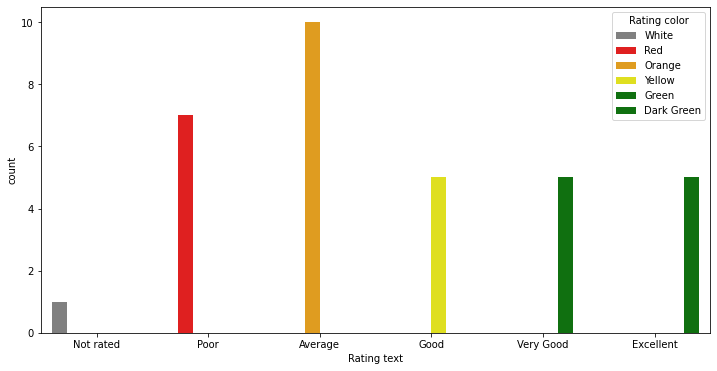

In [ ]:
color = ['grey', 'red', 'orange', 'yellow', 'green', 'green']
sns.countplot(x= 'Rating text', data = rating, hue = 'Rating color', palette= color )

In [ ]:
# countries with no rating

c_rating = data_new[data_new['Rating color']== 'White'].groupby('Country').size().reset_index().rename(columns = {0: 'No. of Ratings'})

In [ ]:
c_rating

,Country,No. of Ratings
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [ ]:
# currencies used by countries

data_new.groupby([	'Currency',	'Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [ ]:
# countries with an option to deliver online

data_new.groupby([	'Has Online delivery',	'Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [ ]:
country_with_online_delivery = data_new[data_new['Has Online delivery']== 'Yes'].groupby('Country').size().reset_index()

country_with_online_delivery

# India is repeated twice because in some places there might not be any delivery option even in India

,Country,0
0,India,2423
1,UAE,28


In [ ]:
city_count = data_new['City'].value_counts()

city_label = data_new['City'].value_counts().index

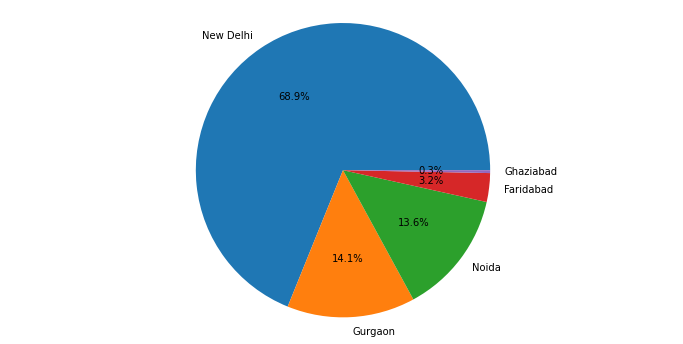

In [ ]:
# pie chart for cities

#explode = (0, 0.05, 0) # takes out 1 slice of the pie( 2nd in this case)

fig1, ax1 = plt.subplots()

ax1.pie(city_count[:5], labels= city_label[:5],  autopct='%1.1f%%')
ax1.axis('equal')

plt.show()

In [ ]:
# top cuisines


top_cuisines = data_new.Cuisines.value_counts()

cuisine_label = data_new.Cuisines.value_counts().index

top_cuisines[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

In [ ]:
cuisine_label[:10]

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food'],
      dtype='object')

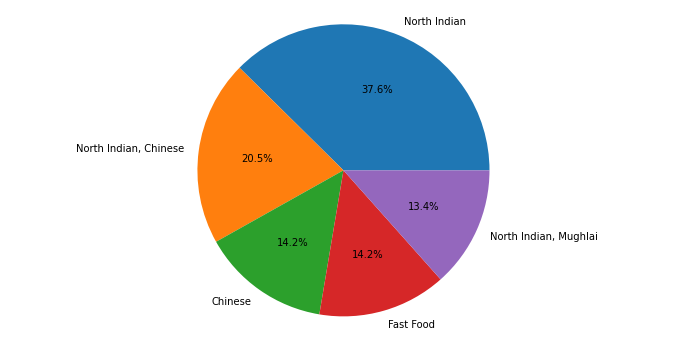

In [ ]:
fig1, ax1 = plt.subplots()

ax1.pie(top_cuisines[:5], labels= cuisine_label[:5],  autopct='%1.1f%%')
ax1.axis('equal')

plt.show()